# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


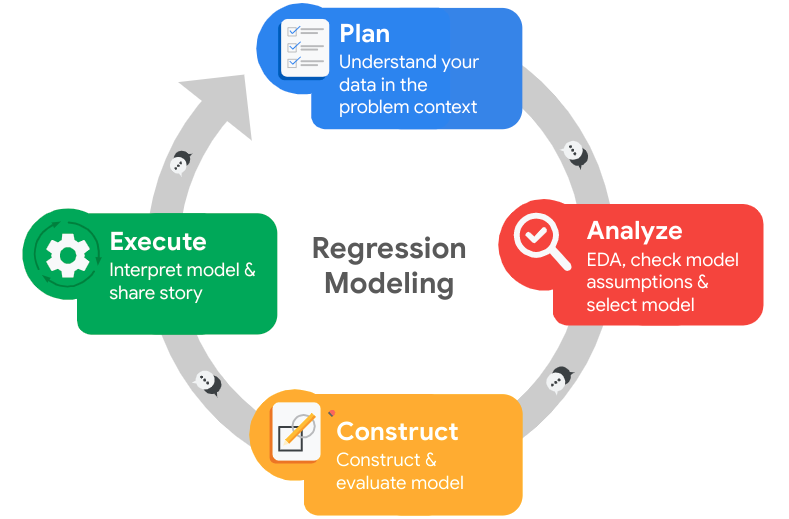

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [18]:
# Import packages
### YOUR CODE HERE ### 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [19]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
### YOUR CODE HERE ###
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [20]:
# Gather basic information about the data
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [21]:
# Gather descriptive statistics about the data
### YOUR CODE HERE ###
df0.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [22]:
# Display all column names
### YOUR CODE HERE ###
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [23]:
# Rename columns as needed

# Note: no spaces or such, but a small typo
df0 = df0.rename({'average_montly_hours' : 'average_monthly_hours'}, axis = 1)

# Display all column names after the update

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [24]:
# Check for missing values

# Note: upon inspecting the df0.info() results, there were not any missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [25]:
# Check for duplicates
df0.duplicated().value_counts()

False    11991
True      3008
Name: count, dtype: int64

In [26]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated() == True] # Note this dataframe does not include the original row, if wanted we can put keep = False as a paramter in duplicated()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [27]:
# Drop duplicates and save resulting dataframe in a new variable as needed
# We will drop them as it is highly unlikely that 2 employees share the same department, performance review, hours spent with company, etc.
df0 = df0[df0.duplicated() == False]

# Display first few rows of new dataframe as needed
### YOUR CODE HERE ###
df0

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

Check for outliers in the data.

<Axes: >

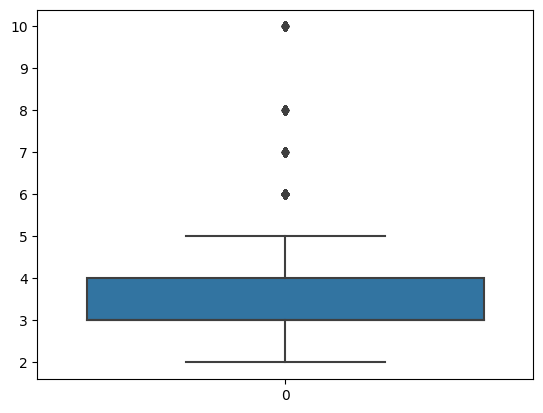

In [28]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df0['time_spend_company'])

In [29]:
# Determine the number of rows containing outliers
median = df0['time_spend_company'].median()
iqr = df0['time_spend_company'].quantile(0.75) - df0['time_spend_company'].quantile(0.25)
outliers = df0[(df0['time_spend_company'] > (median + 1.5 * iqr)) | (df0['time_spend_company'] < (median - 1.5 * iqr))]
outliers

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
1,0.80,0.86,5,262,6,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
12,0.84,0.92,4,234,5,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11994,0.22,0.94,3,193,10,0,0,1,management,high
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [30]:
# Get numbers of people who left vs. stayed
df0['left'].value_counts()

# Get percentages of people who left vs. stayed
df0['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [31]:
# Create a plot as needed
df0

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [32]:
# Create a plot as needed
### YOUR CODE HERE ###

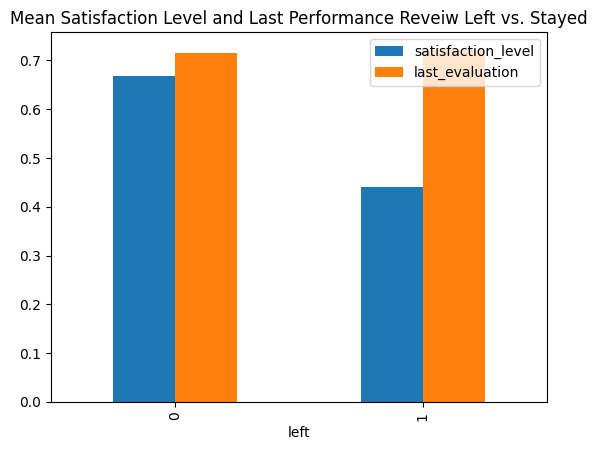

In [33]:
# Create a plot as needed
df0.groupby('left')[['satisfaction_level', 'last_evaluation']].mean().plot.bar()
plt.title("Mean Satisfaction Level and Last Performance Reveiw Left vs. Stayed");

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206
number_project,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544
average_monthly_hours,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964
time_spend_company,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828
Work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657
promotion_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000


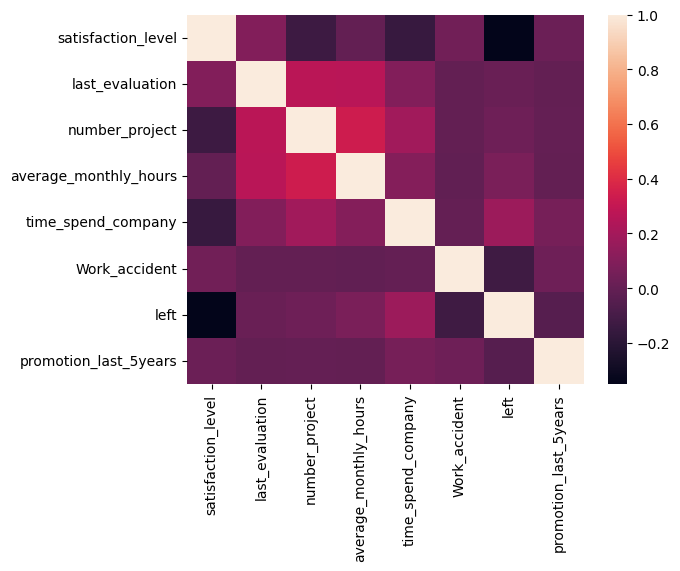

In [40]:
# Create a plot as needed
sns.heatmap(df0.drop(['Department', 'salary'], axis = 1).corr());
df0.drop(['Department', 'salary'], axis = 1).corr()

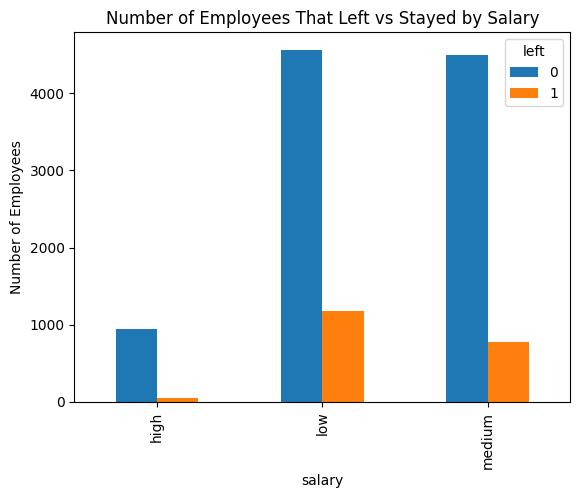

In [41]:
# Create a plot as needed
df0.groupby(['salary', 'left']).size().unstack().plot.bar()
plt.ylabel('Number of Employees');
plt.title("Number of Employees That Left vs Stayed by Salary");

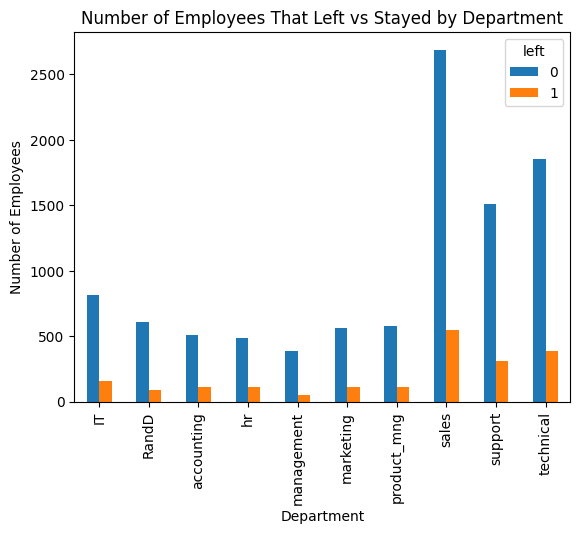

In [42]:
# Create a plot as needed
df0.groupby(['Department', 'left']).size().unstack().plot.bar()
plt.ylabel("Number of Employees")
plt.title('Number of Employees That Left vs Stayed by Department');

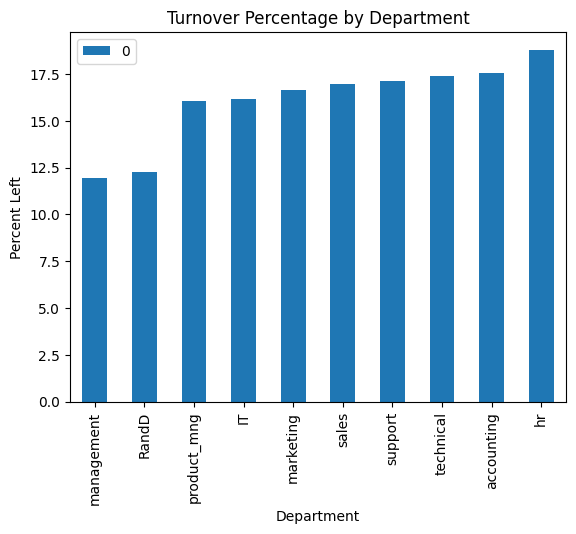

In [43]:
# Create a plot as needed
a = pd.DataFrame((df0[df0['left'] == 1].groupby('Department').size()/df0.groupby('Department').size())*100)
a.sort_values(0).plot.bar()
plt.ylabel("Percent Left")
plt.title("Turnover Percentage by Department");

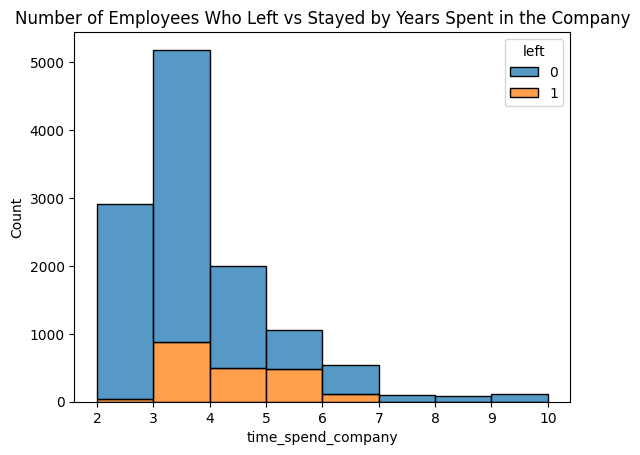

In [44]:
# Create a plot as needed
### YOUR CODE HERE ###
sns.histplot(x = 'time_spend_company', data = df0, hue = 'left', binwidth = 1, multiple = 'stack')

plt.title("Number of Employees Who Left vs Stayed by Years Spent in the Company");

### Insights

[What insights can you gather from the plots you created to visualize the data? Double-click to enter your responses here.]

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

We are identifying a binary categorical variable called 'left'.

### Identify the types of models most appropriate for this task.

We will implement a random forest model and an xgboost model.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [47]:
# Our imports for the following models
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [48]:
# Some data preprocessing
y = df0['left']
X = df0.drop('left', axis = 1)
X = X.drop(['last_evaluation'], axis = 1) #shown in our correlation matrix to have the least correlation with 'left' (our dependent variable)

# Enumerating the categorical variable 'Department'
dept_val = X['Department'].unique()
dept_num = [i for i in range(len(X['Department'].unique()))]
X['Department'] = X['Department'].map(dict(zip(dept_val, dept_num)))


# One-hot-encoding for the categorical variable 'salary'
X = pd.get_dummies(X, drop_first = True)
X

,satisfaction_level,number_project,average_monthly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary_low,salary_medium
0,0.38,2,157,3,0,0,0,True,False
1,0.80,5,262,6,0,0,0,False,True
2,0.11,7,272,4,0,0,0,False,True
3,0.72,5,223,5,0,0,0,True,False
4,0.37,2,159,3,0,0,0,True,False
...,...,...,...,...,...,...,...,...,...
11995,0.90,3,259,10,1,1,5,False,False
11996,0.74,5,266,10,0,1,5,False,False
11997,0.85,3,185,10,0,1,5,False,False
11998,0.33,3,172,10,0,1,8,False,False


In [49]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state = 0)

In [50]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (8993, 9)
X_test shape: (2998, 9)
y_train shape: (8993,)
y_test shape: (2998,)


In [62]:
# Testing a Logistic Regression model without any sort of class balancing done
log_clf = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [52]:
log_y_pred = log_clf.predict(X_test)

In [53]:
print(metrics.classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2526
           1       0.45      0.18      0.25       472

    accuracy                           0.84      2998
   macro avg       0.65      0.57      0.58      2998
weighted avg       0.80      0.84      0.80      2998



In [56]:
%%time
# Implementing a Random Forest Model with GridSearchCV for hyperparameter tuning
rf_clf = RandomForestClassifier(random_state = 0)

cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,3,4],
             'n_estimators': [75, 100, 125, 150]
             }  
scoring = ['accuracy', 'precision', 'recall', 'f1']

rf_gs = GridSearchCV(rf_clf, cv_params, scoring = scoring, cv = 5, refit = 'f1').fit(X_train, y_train)

CPU times: total: 15min 24s
Wall time: 15min 37s


In [57]:
rf_gs.best_score_

0.946709055940589

In [58]:
rf_y_pred = rf_gs.best_estimator_.predict(X_test)
print(metrics.classification_report(y_test,  rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.96      0.93      0.94       472

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [59]:
%%time
# Implementing a Random Forest Model with GridSearchCV for hyperparameter tuning

xgb_clf = XGBClassifier(objective = 'binary:logistic', random_state = 0)

cv_params = {'max_depth': [4,5,6,7,8], 
             'min_child_weight': [1,2,3,4,5],
             'learning_rate': [0.1, 0.2, 0.3],
             'n_estimators': [75, 100, 125]
             }  
scoring = ['accuracy', 'precision', 'recall', 'f1']

xgb_gs = GridSearchCV(xgb_clf, cv_params, scoring = scoring, cv = 5, refit = 'f1').fit(X_train, y_train)

CPU times: total: 37min 23s
Wall time: 2min 28s


In [60]:
xgb_gs.best_score_

0.9452263119499795

In [61]:
xgb_y_pred = xgb_gs.best_estimator_.predict(X_test)
print(metrics.classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.96      0.93      0.95       472

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [98]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay, roc_auc_score

### Logistic Regression Model Results

In [70]:
print(metrics.classification_report(y_test, log_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      2526
           1       0.45      0.18      0.25       472

    accuracy                           0.84      2998
   macro avg       0.65      0.57      0.58      2998
weighted avg       0.80      0.84      0.80      2998



Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

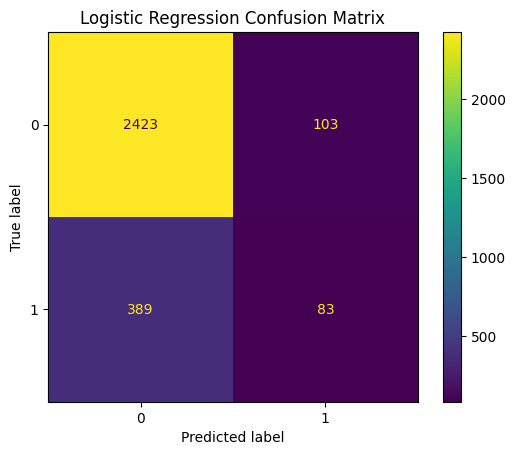

In [115]:
log_cm = confusion_matrix(y_test, log_y_pred)
ConfusionMatrixDisplay(log_cm, display_labels = log_clf.classes_).plot()
plt.title("Logistic Regression Confusion Matrix")

Text(0.5, 1.0, 'Logistic Regression ROC Curve')

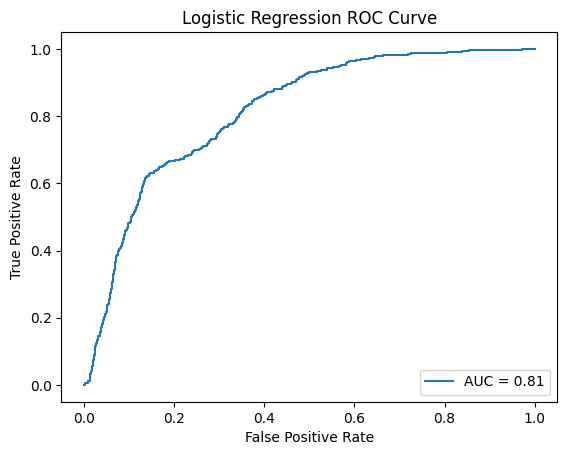

In [114]:
log_y_prob = log_clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, log_y_prob[:,1])
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc_score(y_test, log_y_prob[:,1])).plot()
plt.title("Logistic Regression ROC Curve")

### Random Forest Model Results

In [109]:
print(metrics.classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.96      0.93      0.94       472

    accuracy                           0.98      2998
   macro avg       0.97      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

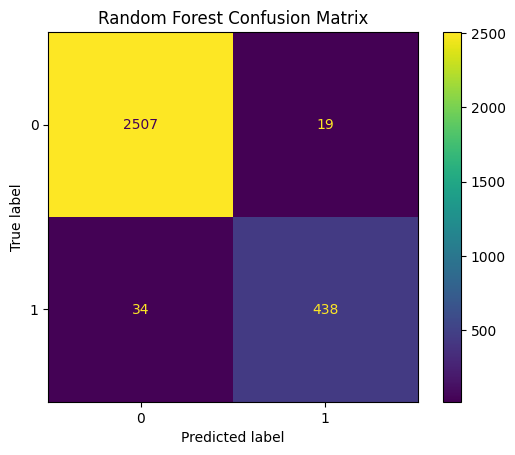

In [116]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
ConfusionMatrixDisplay(rf_cm, display_labels = rf_gs.best_estimator_.classes_).plot()
plt.title("Random Forest Confusion Matrix")

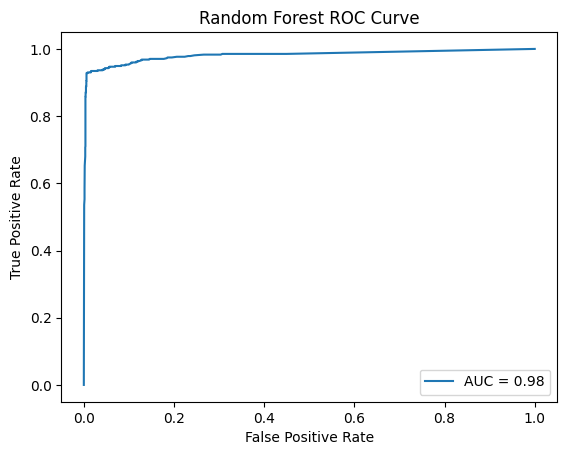

In [106]:
rf_y_prob = rf_gs.best_estimator_.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, rf_y_prob[:,1])
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc_score(y_test, rf_y_prob[:,1])).plot()
plt.title("Random Forest ROC Curve");

### XGBoost Model Results

In [111]:
print(metrics.classification_report(y_test, xgb_y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2526
           1       0.96      0.93      0.95       472

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



Text(0.5, 1.0, 'XGBoost Confusion Matrix')

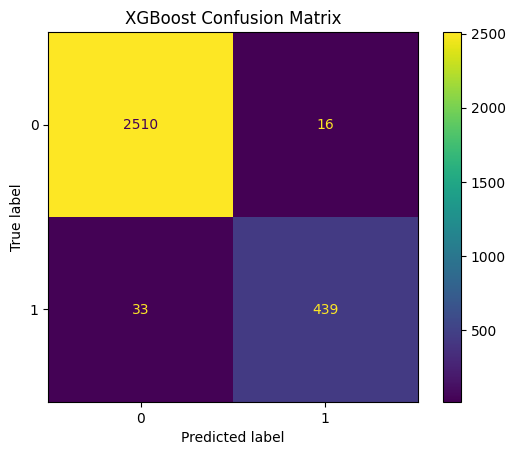

In [117]:
xgb_cm = confusion_matrix(y_test, xgb_y_pred)
ConfusionMatrixDisplay(xgb_cm, display_labels = xgb_gs.best_estimator_.classes_).plot()
plt.title("XGBoost Confusion Matrix")

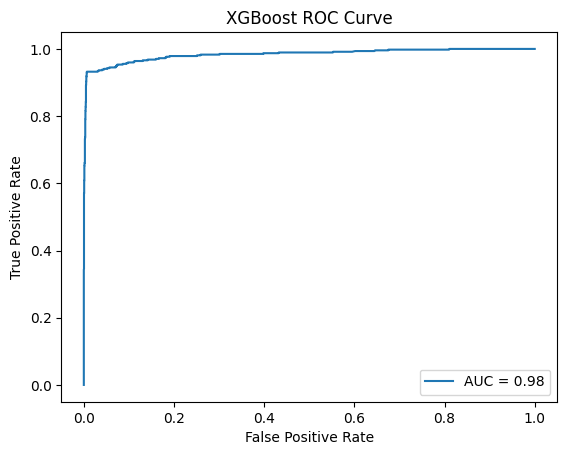

In [118]:
xgb_y_prob = xgb_gs.best_estimator_.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, xgb_y_prob[:,1])
RocCurveDisplay(fpr = fpr, tpr = tpr, roc_auc = roc_auc_score(y_test, xgb_y_prob[:,1])).plot()
plt.title("XGBoost ROC Curve");

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

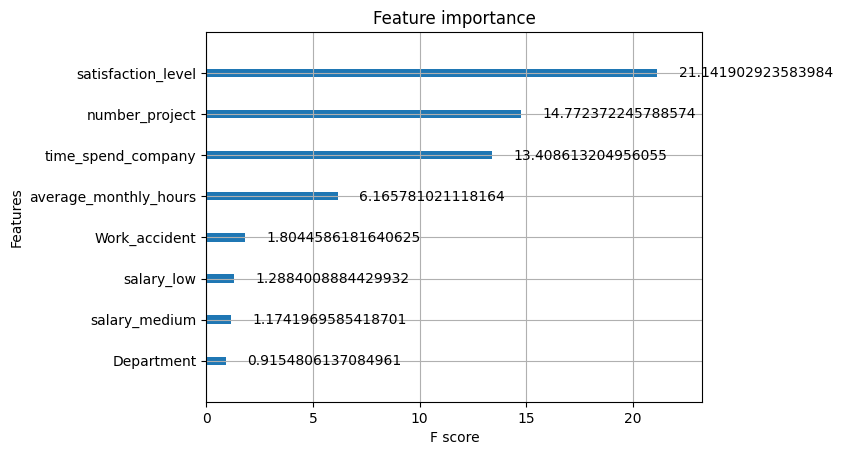

In [120]:
from xgboost import plot_importance
plot_importance(xgb_gs.best_estimator_, importance_type = "gain")

💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



Double-click to enter your responses here.

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

Overall the XGBoost model had the best results by a very small margin over the random forest model. Our XGBoost had a 98% accuracy score and a 95% f1-score on the test data. 

### Conclusion, Recommendations, Next Steps

[Double-click to enter your conclusion, recommendations, and next steps here.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.